**Importing the Modules**

In [1]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

**Reading CSV file for Correlation**

In [2]:
#importing the dataset as a dataframe
df = pd.read_csv("iris_flower.csv")

In [3]:
#displaying the dataframe
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#finding size of dataframe
df.shape

(150, 6)

In [6]:
#checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Renaming Columns name**

In [8]:
#renaming the columns for easier use
df.rename(columns={'SepalLengthCm': 'sepalLength', 'SepalWidthCm': 'sepalWidth', 'PetalLengthCm': 'petalLength', 'PetalWidthCm': 'petalWidth', 'Species': 'species'}, inplace=True)
df.rename(columns={'Id': 'id'}, inplace=True)

In [9]:
#removing the 'id' column as it is irrelevant
df = df.drop('id', axis=1)

In [10]:
#5-number summary
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Preprocessing #

In [11]:
#importing the necessary libraries for encoding, standardization and splitting the dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

**Enoding the Species column from object to int**

In [12]:
#encoding the categorical variable (species)
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

**Splitting data into features and target**

In [13]:
#splitting the data into features and target
X = df.drop('species', axis=1)
y = df['species']

In [14]:
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df0 = df[df.species == 0]
df1 = df[df.species == 1]
df2 = df[df.species == 2]

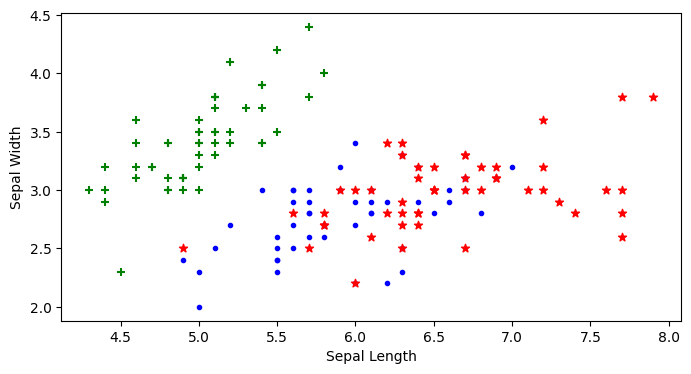

In [16]:
plt.figure(figsize=(8,4))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepalLength'], df0['sepalWidth'],color="green",marker='+' , label = df.species == 0)
plt.scatter(df1['sepalLength'], df1['sepalWidth'],color="blue",marker='.',  label = df.species == 1)
plt.scatter(df2['sepalLength'], df2['sepalWidth'],color="red",marker='*',  label = df.species == 2)

plt.show()

**Visualizing Heatmap**

In [17]:
correlation=df.corr()

<AxesSubplot: >

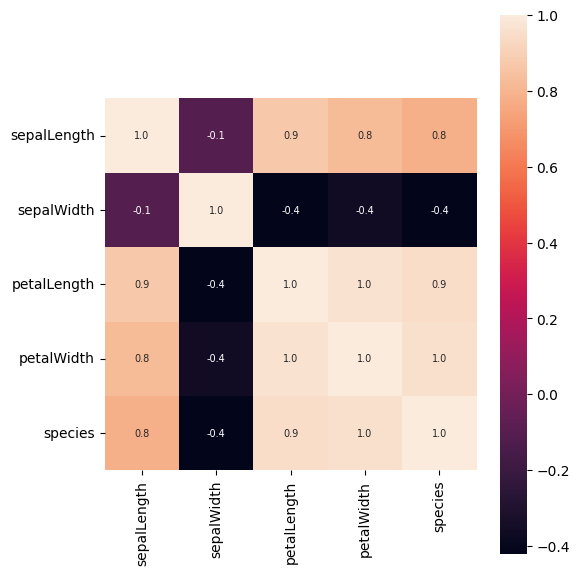

In [18]:
plt.figure(figsize=(6,7))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,
             annot_kws={'size':7})

**Graphical Representation of Average Features values**

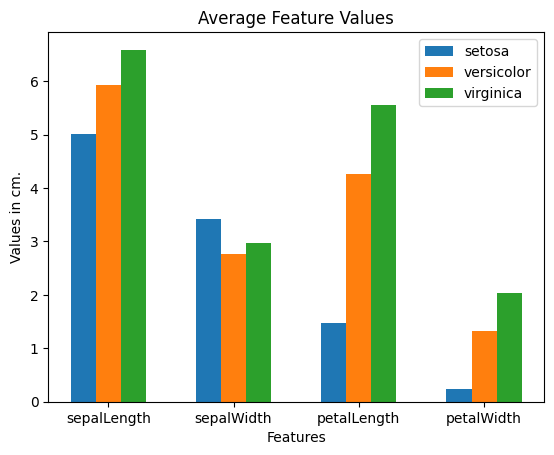

In [19]:
Xx = df[['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']].values
Yy = df['species'].values

unique_Y = np.unique(Yy)
num_features = X.shape[1]
Y_Data = np.zeros((num_features, len(unique_Y),), dtype='float32')

for j in unique_Y:
    for i in range(num_features):
        Y_Data[i, j] = np.mean(Xx[:, i][Yy == j].astype('float32'))

# Transpose the data for plotting
Y_Data_reshaped = Y_Data.T

# Define the feature labels
feature_labels = ["sepalLength", "sepalWidth", "petalLength", "petalWidth"]

# Create a bar plot
x = np.arange(len(feature_labels))
width = 0.2

# Custom class labels
class_labels = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

for i in range(len(unique_Y)):
    plt.bar(x + i * width, Y_Data_reshaped[i], width, label=f'{class_labels[unique_Y[i]]}')

plt.xlabel('Features')
plt.ylabel('Values in cm.')
plt.title('Average Feature Values')
plt.xticks(x + width, feature_labels)
plt.legend()
plt.show()


**Reading CSV file for trianing the models**

In [20]:
df = pd.read_csv("iris_flower.csv")

In [21]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**Splitting the data into training and testing**

In [22]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

In [23]:
#scaling the numeric variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applying ML models #

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, MaxPooling2D
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
model = Sequential([
    Dense(256, input_shape=(4,), activation='relu'),
    Dense(256, activation='relu'),
    
    Dense(512, activation='sigmoid'),
    Dense(256, activation='relu'),
    
    Dense(128, activation='sigmoid'),
    Dense(64, activation='relu'),
    
    Dense(32, activation='sigmoid'),
    Dense(3, activation='softmax')  # 3 classes for Iris dataset
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
3/3 [==============================] - 1s 88ms/step - loss: 1.1054 - accuracy: 0.3854 - val_loss: 1.1116 - val_accuracy: 0.2083
Epoch 2/150
3/3 [==============================] - 0s 16ms/step - loss: 1.0882 - accuracy: 0.3854 - val_loss: 1.1262 - val_accuracy: 0.2083
Epoch 3/150
3/3 [==============================] - 0s 28ms/step - loss: 1.0823 - accuracy: 0.3854 - val_loss: 1.1381 - val_accuracy: 0.2083
Epoch 4/150
3/3 [==============================] - 0s 27ms/step - loss: 1.0624 - accuracy: 0.3854 - val_loss: 1.1057 - val_accuracy: 0.2083
Epoch 5/150
3/3 [==============================] - 0s 20ms/step - loss: 1.0233 - accuracy: 0.3854 - val_loss: 1.0410 - val_accuracy: 0.5833
Epoch 6/150
3/3 [==============================] - 0s 17ms/step - loss: 0.9569 - accuracy: 0.7083 - val_loss: 0.9585 - val_accuracy: 0.5833
Epoch 7/150
3/3 [==============================] - 0s 17ms/step - loss: 0.8571 - accuracy: 0.7083 - val_loss: 0.8543 - val_accuracy: 0.5833
Epoch 8/150
3/3 [===

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

1/1 [==============================] - 0s 38ms/step - loss: 0.1901 - accuracy: 0.9667
Test Accuracy: 96.67%


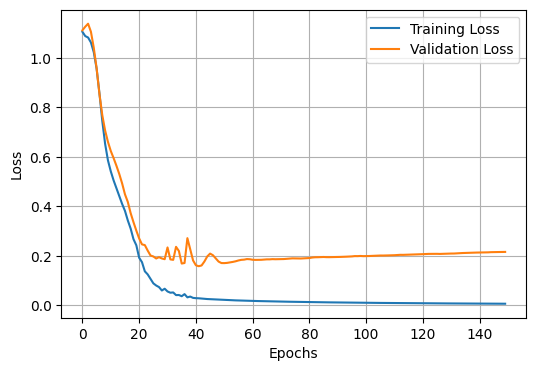

In [27]:
# Plot training and validation loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

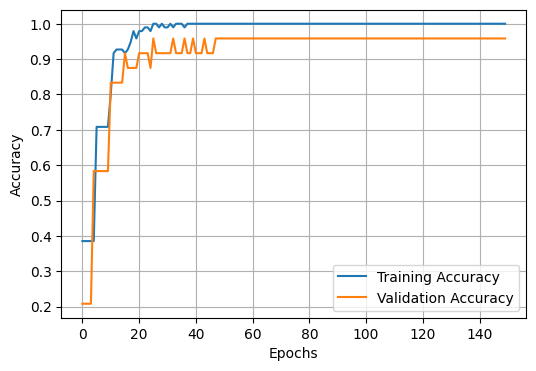

In [28]:
# Plot training and validation accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

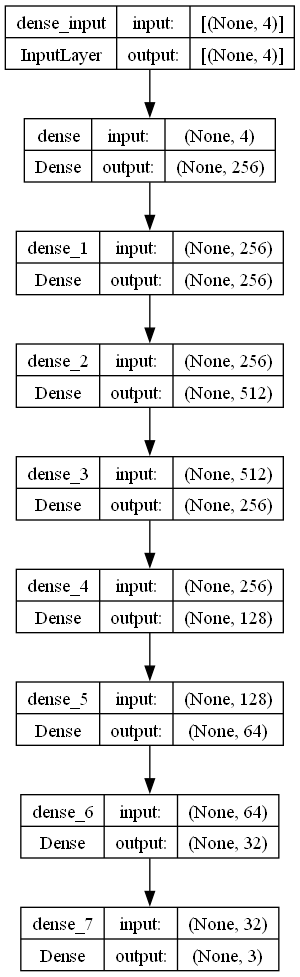

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

1/1 [==============================] - 0s 16ms/step


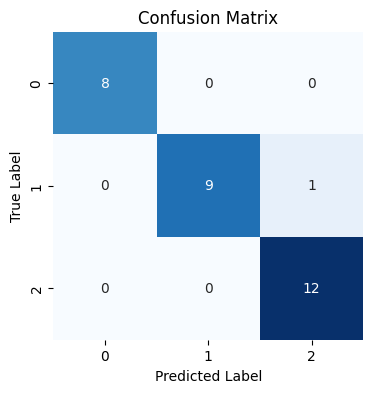

In [31]:
from sklearn.metrics import confusion_matrix
# Predict on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Construct the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error

# Assuming you have your predicted values (y_pred) and actual values (y_true)
rmse = mean_squared_error(X_test, y_train, squared=False)  # Set squared=False to get RMSE

print("Root Mean Squared Error (RMSE):", rmse)


ValueError: Found input variables with inconsistent numbers of samples: [30, 120]